In [189]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

## Based on this: https://people.csail.mit.edu/rameshvs/content/gmm-em.pdf

## Generate data

In [171]:
group1_mean=12
group1_std=1
group2_mean=7
group2_std=1

group1_data=np.random.normal(group1_mean, group1_std, 2000)
group2_data=np.random.normal(group2_mean, group2_std, 2000)

In [172]:
data=np.stack([group1_data, group2_data], axis=0).flatten()
data.shape

(4000,)

array([[<AxesSubplot:title={'center':'data'}>]], dtype=object)

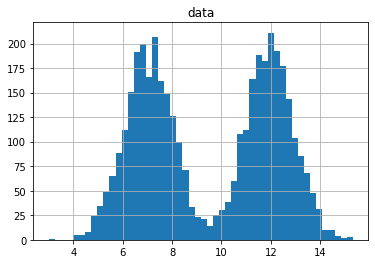

In [173]:
df_data=pd.DataFrame({'data':data})
df_data.hist(bins=50)

## Initialize em

In [174]:
def m_step(mean1, mean2, std1, std2, data):
    """probability that datapoint is in first or second distribution"""
    p1=scipy.stats.norm(mean1, std1).pdf(data)
    p2=scipy.stats.norm(mean2, std2).pdf(data)
    return p1, p2

In [175]:
def e_step(p1, p2, pi1, pi2, data):
    """calculate new mean and cluster assingment probabilities"""
    p_c1=(pi1*p1)/(pi1*p1+pi2*p2)
    p_c2=(pi2*p2)/(pi1*p1+pi2*p2)
    mean_new1=(p_c1*data).sum()/p_c1.sum()
    mean_new2=(p_c2*data).sum()/p_c2.sum()
    return mean_new1, mean_new2, p_c1, p_c2

In [176]:
#initial guesses
std1=1
mean1=2
std2=1
mean2=10
#which point has which probability to belong to cluster 1 or 2
pi1=np.random.random(size=df_data.shape[0])
pi2=1-pi1

means1=[]
means2=[]
stop_threshold=0.001
run=True

while run:
    p1, p2 = m_step(mean1, mean2, std1, std2, df_data.data)
    mean1, mean2, pi1, pi2 = e_step(p1, p2, pi1, pi2, df_data.data)
    means1.append(mean1)
    means2.append(mean2)
    if len(means1)>1 and (abs(mean1-means1[-2])<stop_threshold or abs(mean2-means2[-2])<stop_threshold):
                              run=False   

In [178]:
mean2

11.94041319168995

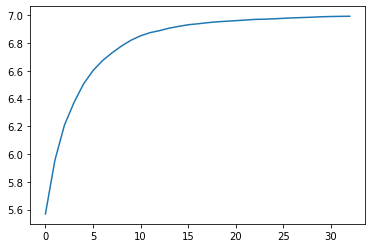

In [179]:
plt.plot(means1)

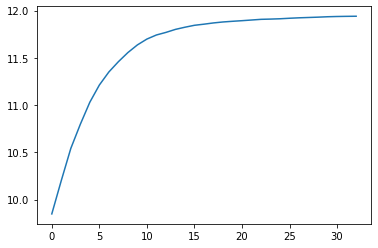

In [180]:
plt.plot(means2)

<AxesSubplot:xlabel='data', ylabel='Count'>

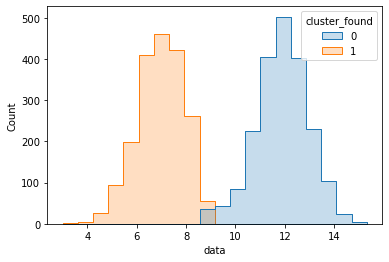

In [192]:
df_data['cluster_found']=pi1.astype(int)
sns.histplot(data=df_data, x="data", hue="cluster_found", element="step")